# Carter Klein, Matthew Gallagher
# Big Data Bowl Playground for Gathering / Analyzing Data
## Created 1/3/2019 | Submission due 1/22/2019

In [12]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import itertools
import seaborn as sns

# We need ffmpeg to play video of plays. 
# This information was gathered from an implementation of:
# https://github.com/yj7082126/Football-Madness/blob/master/Code/animate.py
# On a Linux distro

plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
import re

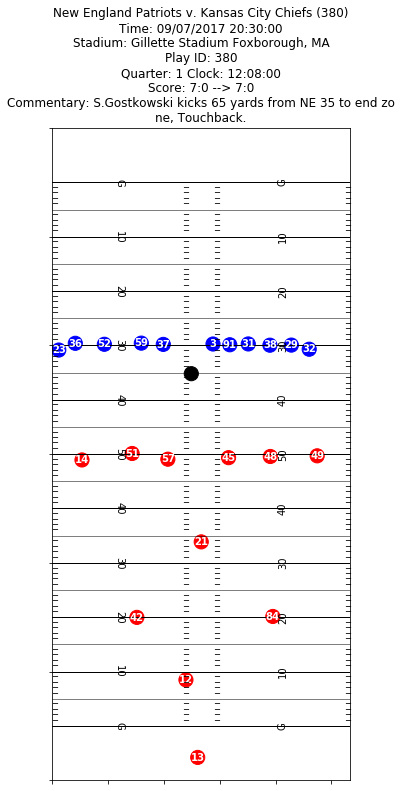

In [5]:
# Get specific play from specific game:
gameId = 2017090700
playId = 380

# So that we don't have to retype this every time
text = "https://raw.githubusercontent.com/nfl-football-ops/Big-Data-Bowl/master/Data/"

recordFile_name = 'tracking_gameId_' + str(gameId) + '.csv'

# Get info from .csv files
track_file = pd.read_csv(text + recordFile_name)
game_file = pd.read_csv(text + 'games.csv')
plays_file = pd.read_csv(text + 'plays.csv')
player_file = pd.read_csv(text + 'players.csv')

# Join games and plays
main_file = track_file.merge(game_file)
main_file = main_file.merge(plays_file)
main_file = main_file.loc[main_file['playId'] == playId, ]

home_team = main_file['homeDisplayName'].iloc[0]
visitor_team = main_file['visitorDisplayName'].iloc[0]
title = home_team + ' v. ' + visitor_team + ' (' + str(playId) + ')'

game_date = main_file['gameDate'].iloc[0]
game_time = main_file['gameTimeEastern'].iloc[0]
game_stadium = main_file['Stadium'].iloc[0]
game_location = main_file['Location'].iloc[0]

subtitle = 'Time: ' + str(game_date) + ' ' + str(game_time) + '\nStadium: ' + str(
        game_stadium) + ' ' + str(game_location)

actions = main_file.loc[~main_file['event'].isna(), ]

commentary = str(main_file["playDescription"].iloc[0])
commentary = re.sub("(.{48})", "\\1\n", commentary, 0, re.DOTALL)
#    play_text = "Play ID: " + str(main_file['playId'].iloc[0]) + "\nQuarter: " + str(main_file[
#            'quarter'].iloc[0]) + " Clock: " + str(main_file['GameClock'].iloc[0
#            ]) + "\nScore: " + str(main_file['HomeScoreBeforePlay'].iloc[0]) + ":" + str(main_file[
#            'VisitorScoreBeforePlay'].iloc[0]) + " --> " + str(main_file["HomeScoreAfterPlay"
#            ].iloc[0]) + ":" + str(main_file["VisitorScoreAfterPlay"].iloc[0]) + "\nCommentary: " + str(
#            " ".join(commentary.split(' ')[:2])) + "\n" + " ".join(commentary.split(' ')[2:
#            ]).split(',')[0] + "\n" + " ".join(commentary.split(' ')[2:]).split(',')[1]
 
play_text = "Play ID: " + str(main_file['playId'].iloc[0]) + "\nQuarter: " + str(main_file[
        'quarter'].iloc[0]) + " Clock: " + str(main_file['GameClock'].iloc[0
        ]) + "\nScore: " + str(main_file['HomeScoreBeforePlay'].iloc[0]) + ":" + str(main_file[
        'VisitorScoreBeforePlay'].iloc[0]) + " --> " + str(main_file["HomeScoreAfterPlay"
        ].iloc[0]) + ":" + str(main_file["VisitorScoreAfterPlay"].iloc[0]) + "\nCommentary: " + str(
        commentary)

xmin = 0
xmax = (160/3)
hash_right = 38.35
hash_left = 12
hash_width = 3.3

ymin=0
ymax=120

xlim = [0, (701/30), (899/30), xmax]
ylim = list(range(10, 110))

df_hash = pd.DataFrame(list(itertools.product(xlim,ylim)))
df_hash.columns = ['x', 'y']

df_hash = df_hash.loc[(df_hash['y'] % 5) != 0, ]

color = {'home': 'blue', 'away': 'red', 'ball': 'black'}
inv_size = 10
el_size = 200

frame = 1
fig, ax = plt.subplots(figsize=((xmax-xmin)/inv_size, (ymax-ymin)/inv_size))
frame_file = main_file.loc[main_file['frame.id'] == frame, ]

players = ax.scatter(x = xmax-frame_file['y'], y = frame_file['x'], 
           c = frame_file['team'].apply(lambda x: color[x]), s = el_size)
 
numbers = []
for index, row in frame_file.iterrows():
    if ~(np.isnan(row['jerseyNumber'])):
        numbers.append(ax.text(xmax-row['y'], row['x'], int(row['jerseyNumber']), 
                weight='bold', color='white', horizontalalignment='center',
                verticalalignment='center'))
           
        
label_list = ["G"] + list(range(10, 60, 10)) + list(range(40, 0, -10)) + ["G"]
for i, label in enumerate(label_list):
    ax.text(x = 12, y = 10*(i+1), s = label, 
            horizontalalignment='center',
            verticalalignment='center', rotation=270)
    ax.text(x = xmax - 12, y = 10*(i+1), s = label, 
            horizontalalignment='center',
            verticalalignment='center', rotation=90)

for index, row in df_hash.iterrows():
    if (row['x'] < 27.5):
        ax.text(row['x'], row['y'], '_', 
                horizontalalignment='left',
                verticalalignment='bottom')
    else:
        ax.text(row['x'], row['y'], '_', 
                horizontalalignment='right',
                verticalalignment='bottom')

if frame in list(actions['frame.id']):
    action = ax.text(x = xmax/2, y = 0, s = actions.loc[actions['frame.id'] == frame, 
         'event'].iloc[0], horizontalalignment='center', verticalalignment='top')
else:
    action = ax.text(x = xmax/2, y = 0, s = "", 
        horizontalalignment='center', verticalalignment='top') 
            
ax.set_title(title + '\n' + subtitle + '\n' + play_text)

ax.set_yticklabels([])
ax.set_xticklabels([])

for i in list(range(10, 115, 10)):
    plt.axhline(y=i, linewidth=1, color='black')
for i in list(range(10, 115, 5)):
    plt.axhline(y=i, linewidth=0.5, color='black')    
    
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
#plt.show()

#%%

def update(frame):
    frame_file = main_file.loc[main_file['frame.id'] == frame, ]
    
    players.set_offsets(np.c_[xmax-frame_file['y'], frame_file['x']])
    players.set_color(frame_file['team'].apply(lambda x: color[x]))
    
    for el in numbers:
        row = frame_file.loc[frame_file['jerseyNumber'] == int(el.get_text()), ]
        el.set_position((xmax-row['y'], row['x']))
        el.set_color('white')
    
    if frame in list(actions['frame.id'].drop_duplicates()):
        action.set_text(actions.loc[actions['frame.id'] == frame, 'event'].iloc[0])
    else:
        action.set_text("")
    
    return players, numbers, action

an = ani.FuncAnimation(fig, update, frames=list(range(1, max(main_file['frame.id'])+1)), repeat=False)

Writer = ani.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800)

video_title = str(gameId) + '_' + str(playId) + '.mp4'
an.save(video_title, writer=writer)

In [21]:
main_file.columns.values

array(['time', 'x', 'y', 's', 'dis', 'dir', 'event', 'nflId',
       'displayName', 'jerseyNumber', 'team', 'frame.id', 'gameId',
       'playId', 'season', 'week', 'gameDate', 'gameTimeEastern',
       'HomeScore', 'VisitorScore', 'homeTeamAbbr', 'visitorTeamAbbr',
       'homeDisplayName', 'visitorDisplayName', 'Stadium', 'Location',
       'StadiumType', 'Turf', 'GameLength', 'GameWeather', 'Temperature',
       'Humidity', 'WindSpeed', 'WindDirection', 'quarter', 'GameClock',
       'down', 'yardsToGo', 'possessionTeam', 'yardlineSide',
       'yardlineNumber', 'offenseFormation', 'personnel.offense',
       'defendersInTheBox', 'numberOfPassRushers', 'personnel.defense',
       'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'HomeScoreAfterPlay', 'VisitorScoreAfterPlay', 'isPenalty',
       'isSTPlay', 'SpecialTeamsPlayType', 'KickReturnYardage',
       'PassLength', 'PassResult', 'YardsAfterCatch', 'PlayResult',
       'playDescription'], dtype=object)

In [52]:
game_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 21 columns):
season                91 non-null int64
week                  91 non-null int64
gameDate              91 non-null object
gameId                91 non-null int64
gameTimeEastern       91 non-null object
HomeScore             91 non-null int64
VisitorScore          91 non-null int64
homeTeamAbbr          91 non-null object
visitorTeamAbbr       91 non-null object
homeDisplayName       91 non-null object
visitorDisplayName    91 non-null object
Stadium               91 non-null object
Location              91 non-null object
StadiumType           86 non-null object
Turf                  91 non-null object
GameLength            91 non-null object
GameWeather           84 non-null object
Temperature           80 non-null float64
Humidity              90 non-null float64
WindSpeed             76 non-null object
WindDirection         74 non-null object
dtypes: float64(2), int64(5), object(14

In [54]:
plays_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14193 entries, 0 to 14192
Data columns (total 27 columns):
gameId                    14193 non-null int64
playId                    14193 non-null int64
quarter                   14193 non-null int64
GameClock                 14193 non-null object
down                      14193 non-null int64
yardsToGo                 14193 non-null int64
possessionTeam            14193 non-null object
yardlineSide              14013 non-null object
yardlineNumber            14013 non-null float64
offenseFormation          11420 non-null object
personnel.offense         11568 non-null object
defendersInTheBox         11556 non-null float64
numberOfPassRushers       6710 non-null float64
personnel.defense         11568 non-null object
HomeScoreBeforePlay       14193 non-null int64
VisitorScoreBeforePlay    14193 non-null int64
HomeScoreAfterPlay        14193 non-null int64
VisitorScoreAfterPlay     14193 non-null int64
isPenalty                 14193 no

In [ ]:
sns.heatmap(plays_file.loc[:,['YardsAfterCatch','PassLength','PlayResult']].astype(float).corr(), annot=True, cmap="PiYG")

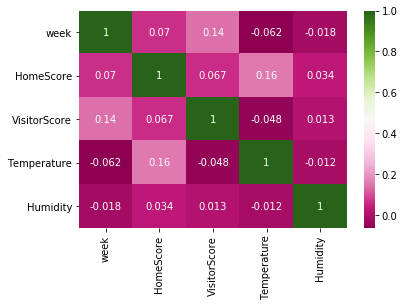

In [41]:
sns.heatmap(game_file.loc[:,['week','HomeScore', 'VisitorScore', 'Temperature', 'Humidity']].astype(float).corr(), annot=True, cmap="PiYG")